In [1]:
%load_ext autoreload
%autoreload 2
import os
#change current working directory to the parent directory
import sys

import numpy as np
from SRtools import sr_mcmc as srmc
from SRtools import deathTimesDataSet as dtds
import matplotlib.pyplot as plt

In [2]:
rawDataFile = 'Rawfiles/240103 VetCompass Mortality - Guinea Pig Open Access.xlsx'


In [17]:
ds = dtds.dsFromFile(rawDataFile, death_times_column = 'Age at death (years)',sheet='240103 GuineaPig Mortality Open',excel_has_header = 0,remove_nan_rows = True)

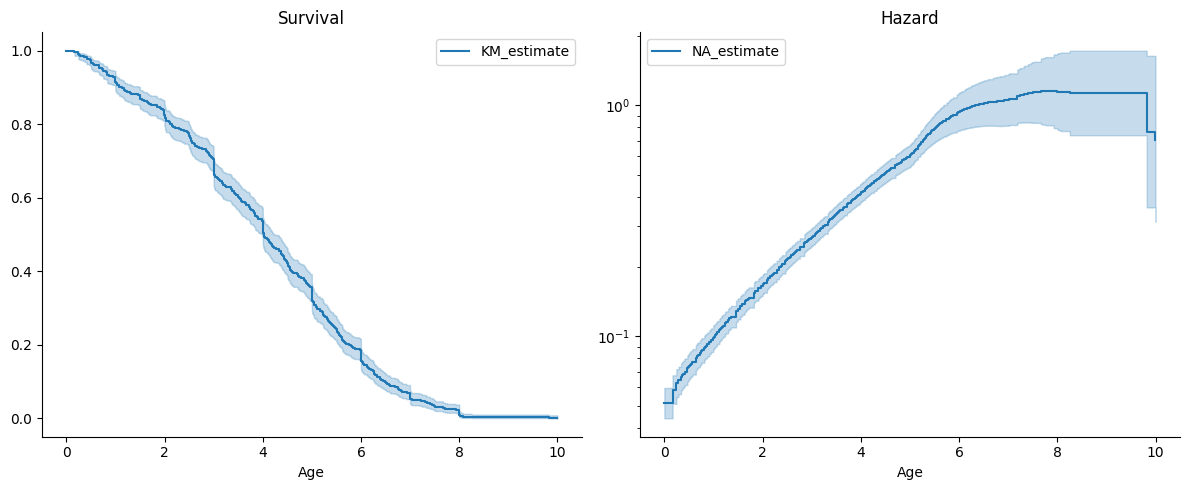

In [20]:
fig, (ax_survival,ax_hazard) = plt.subplots(1, 2, figsize=(12, 5))
ds.plotHazard(ax=ax_hazard)
ds.plotSurvival(ax=ax_survival)
ax_hazard.set_title('Hazard')
ax_survival.set_title('Survival')
plt.tight_layout()
plt.show()

In [45]:
ds.toCsv('cleaned_datasets/Guineapig_VC_data.csv')

In [43]:
from SRtools import SR_hetro as srh
guess = [12.43,40,618,70]
sim = srh.getSrHetro(guess,npeople =5000,nsteps =5000, t_end =10,parallel = True)

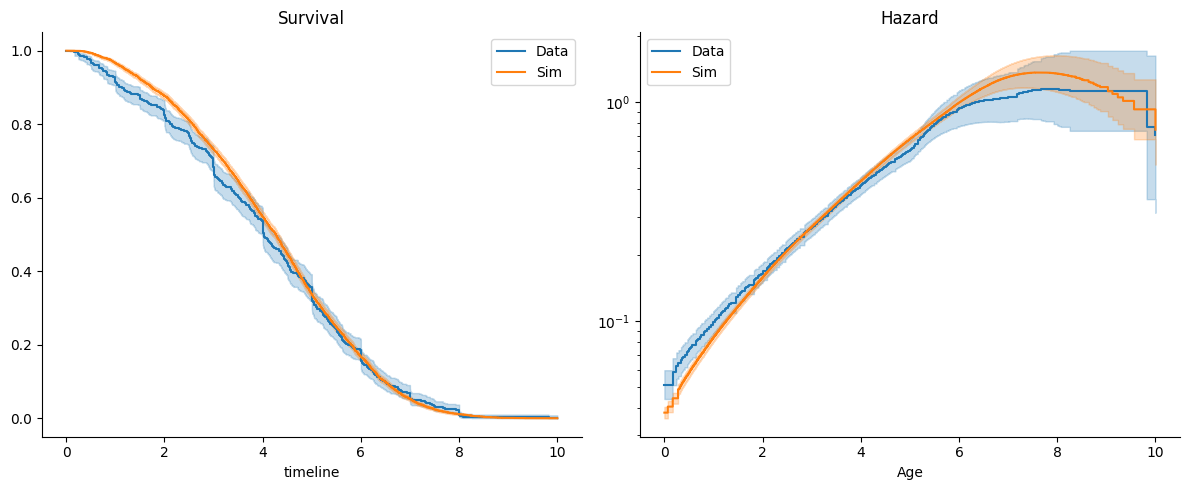

In [44]:
fig, (ax_surv, ax_haz) = plt.subplots(1, 2, figsize=(12, 5))

# Plot ds (dataset)
ds.plotSurvival(ax=ax_surv, label='Data')
ds.plotHazard(ax=ax_haz, label='Data')

# Plot sim (simulation)
if hasattr(sim, 'plotSurvival'):
    sim.plotSurvival(ax=ax_surv, label='Sim')
if hasattr(sim, 'plotHazard'):
    sim.plotHazard(ax=ax_haz, label='Sim')

ax_surv.set_title('Survival')
ax_haz.set_title('Hazard')
ax_surv.legend()
ax_haz.legend()
plt.tight_layout()
plt.show()
